In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('movies.utf.csv',sep='::', engine='python')
df_movies.head()

,1,Toy Story (1995),"Animation|Children's|Comedy,,"
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,"
1,3,Grumpier Old Men (1995),"Comedy|Romance,,"
2,4,Waiting to Exhale (1995),"Comedy|Drama,,"
3,5,Father of the Bride Part II (1995),"Comedy,,"
4,6,Heat (1995),"Action|Crime|Thriller,,"


In [3]:
df_ratings = pd.read_csv('ratings.utf.csv',sep='::', engine='python')
df_ratings.head()

,1,1193,5,978300760
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [4]:
df_users = pd.read_csv('users.utf.csv',sep='::', engine='python')
df_users.head()

,1,F,1.1,10,48067
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [5]:
df_movies.columns =['MovieID','MovieName','Genre']
df_movies.isnull().sum()
     

MovieID      0
MovieName    0
Genre        0
dtype: int64

In [6]:
df_ratings.columns =['UserID','MovieID','Ratings','TimeStamp']
df_ratings.dropna(inplace=True)
df_ratings.head()
df_ratings.isnull().sum()

UserID       0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [7]:
df_ratings.head()

,UserID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [8]:
df_users.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [9]:
user_ratings = pd.merge(df_ratings,df_users, on = ['UserID', 'UserID'])
user_ratings.head()

,UserID,MovieID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,1357,5,978298709,M,56,16,70072
1,2,3068,4,978299000,M,56,16,70072
2,2,1537,4,978299620,M,56,16,70072
3,2,647,3,978299351,M,56,16,70072
4,2,2194,4,978299297,M,56,16,70072


In [10]:
movie_ratings = df_movies.merge(user_ratings, on =['MovieID'])
movie_ratings.head()
     

,MovieID,MovieName,Genre,UserID,Ratings,TimeStamp,Gender,Age,Occupation,Zip-code
0,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",10,5,979168267,F,35,1,95370
1,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",13,3,978202563,M,45,1,93304
2,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",18,2,978152541,F,18,3,95825
3,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",23,2,978461604,M,35,0,90049
4,2,Jumanji (1995),"Adventure|Children's|Fantasy,,",27,1,978129692,M,25,11,19130


In [11]:
movie_ratings.describe()

,MovieID,UserID,Ratings,TimeStamp,Age,Occupation
count,998080.000000,998080.000000,998080.000000,9.980800e+05,998080.000000,998080.000000
mean,1869.434325,3024.608884,3.580357,9.722469e+08,29.744052,8.035970
std,1093.878797,1728.273821,1.117300,1.215794e+07,11.749987,6.531805
min,2.000000,2.000000,1.000000,9.567039e+08,1.000000,0.000000
25%,1034.000000,1506.000000,3.000000,9.653027e+08,25.000000,2.000000
50%,1845.000000,3070.000000,4.000000,9.730190e+08,25.000000,7.000000
75%,2772.000000,4476.000000,4.000000,9.752211e+08,35.000000,14.000000
max,3952.000000,6040.000000,5.000000,1.046455e+09,56.000000,20.000000


In [12]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 998080 entries, 0 to 998079
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MovieID     998080 non-null  int64 
 1   MovieName   998080 non-null  object
 2   Genre       998080 non-null  object
 3   UserID      998080 non-null  int64 
 4   Ratings     998080 non-null  int64 
 5   TimeStamp   998080 non-null  int64 
 6   Gender      998080 non-null  object
 7   Age         998080 non-null  int64 
 8   Occupation  998080 non-null  int64 
 9   Zip-code    998080 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.8+ MB


In [13]:
movie_ratings.shape

(998080, 10)

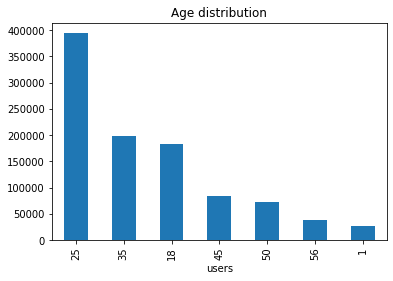

In [14]:
movie_ratings['Age'].value_counts().plot( kind = 'bar', title='Age distribution', xlabel='users')
plt.show()
     

In [15]:
labels = ['1-10','10-20','20-30','30-40','40-50','50-60','60-70']
movie_ratings['age_group']= pd.cut(movie_ratings.Age, range(0,81,11), right=False, labels = labels)
movie_ratings[['Age','age_group']].drop_duplicates()


,Age,age_group
0,35,30-40
1,45,40-50
2,18,10-20
4,25,20-30
9,50,40-50
11,1,1-10
38,56,50-60


In [16]:
movie_ratings['age_group']

0         30-40
1         40-50
2         10-20
3         30-40
4         20-30
          ...  
998075    20-30
998076    20-30
998077    20-30
998078    30-40
998079    10-20
Name: age_group, Length: 998080, dtype: category
Categories (7, object): ['1-10' < '10-20' < '20-30' < '30-40' < '40-50' < '50-60' < '60-70']

In [17]:
ratings01=movie_ratings['Genre'].str.get_dummies('|')
ratings01= ratings01.drop_duplicates()
ratings01.head()

,Action,"Action,","Action,,",Adventure,"Adventure,","Adventure,,",Animation,"Animation,","Animation,,",Children's,...,"Sci-Fi,,",Thriller,"Thriller,","Thriller,,",War,"War,","War,,",Western,"Western,","Western,,"
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1349,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1645,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [18]:
movie_ratings.groupby('Gender').size().sort_values(ascending=False)

Gender
M    752283
F    245797
dtype: int64

<Axes: xlabel='Age'>

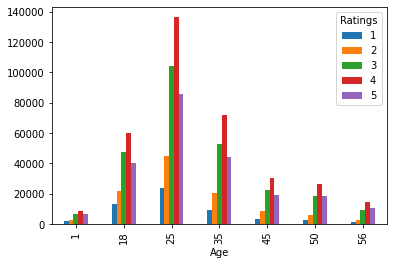

In [19]:
movie_ratings.groupby(['Age','Ratings']).size().unstack().plot(kind='bar', stacked=False)

<Axes: xlabel='Gender'>

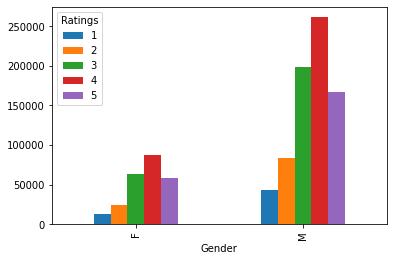

In [20]:
movie_ratings.groupby(['Gender','Ratings']).size().unstack().plot(kind='bar', stacked=False)

<Axes: xlabel='Occupation'>

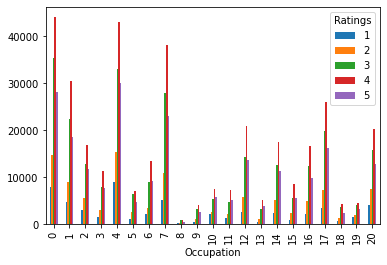

In [21]:
movie_ratings.groupby(['Occupation','Ratings']).size().unstack().plot(kind='bar', stacked=False)

In [22]:
x = movie_ratings[['MovieID','Age','Occupation']].values
y= movie_ratings['Ratings'].values

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)


In [25]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_predict= lr.predict(x_test)
acc_model = accuracy_score(y_test, y_predict)


D:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print('accuracy',acc_model)

accuracy 0.3486727850806883


In [27]:
print(x_train)

[[2571   25   14]
 [ 500   25    1]
 [1094   25   20]
 ...
 [ 377   25    0]
 [1911   18    4]
 [1198   25   17]]


In [28]:
print(y)

[5 3 2 ... 4 1 4]


In [29]:
lr.predict([[1150, 45, 1]])

array([4], dtype=int64)

In [30]:
lr.predict([[1869,29,8]])

array([4], dtype=int64)